In [2]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

### TODOs:
* [ ] Viz correlations <-- Here
* [ ] Factor analysis of the stats
* [ ] Maybe clustering?


In [3]:
from autorocks.dir_struct import RootDir

exp_name = "fft_transpose"  # "stencil_stencil3d"  # aes_workload
exp_dir = RootDir.parents[1] / f"local_execution/gem5/{exp_name}/20_params/100_iter"

In [4]:
from notebooks.gem5.statistics_parser import all_models_parser

df = all_models_parser(exp_dir)

Exp parsing in /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter
No checkpoint file found, requiring update.
Iterations parsing in /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/BoTorch
No checkpoint file found, requiring update.
Steps parsing in /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/BoTorch/2021_09_06_14_59
No checkpoint file found, requiring update.
Steps parsing in /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/BoTorch/2021_09_06_13_36
No checkpoint file found, requiring update.
Steps parsing in /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/BoTorch/2021_09_06_12_13
No checkpoint file found, requiring update.
Iterations parsing in /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/Default
No checkpoint file found, requiring update.
Steps p

# TODOs
[] Viz against target (edp)
[] Find correlation to edp


In [7]:
from autorocks.viz.data.data_manager import generate_model_comparison_files
import numpy as np

model_comparison_data = generate_model_comparison_files(exp_dir)

system_pref = model_comparison_data.system_performance
pdp = system_pref["bench_stats.avg_power"] * system_pref["bench_stats.cycle"]
edp = np.log(system_pref["bench_stats.cycle"].values * pdp.values)
# pdp
system_pref["edp"] = edp

Creating: /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/compare_all_models_training_time.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/compare_all_models_perf_step.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5/fft_transpose/20_params/100_iter/compare_all_models_params.csv


In [8]:
# Check correlations between different summary objectives
# target_var = "mixgraph_iops"
target_var = "edp"
### Correlation between target features
feature_corr = system_pref.corr()
# sns.heatmap(feature_corr, annot=True, cmap = plt.cm.Reds)
# target is mixgraph_iops
cor_target = abs(feature_corr[target_var])  # Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
len(relevant_features)
for feature in relevant_features.keys():
    print(feature)

bench_stats.total_area
bench_stats.avg_power
bench_stats.avg_mem_power
bench_stats.avg_mem_dynamic_power
bench_stats.avg_mem_leakage_power
bench_stats.mem_area
edp


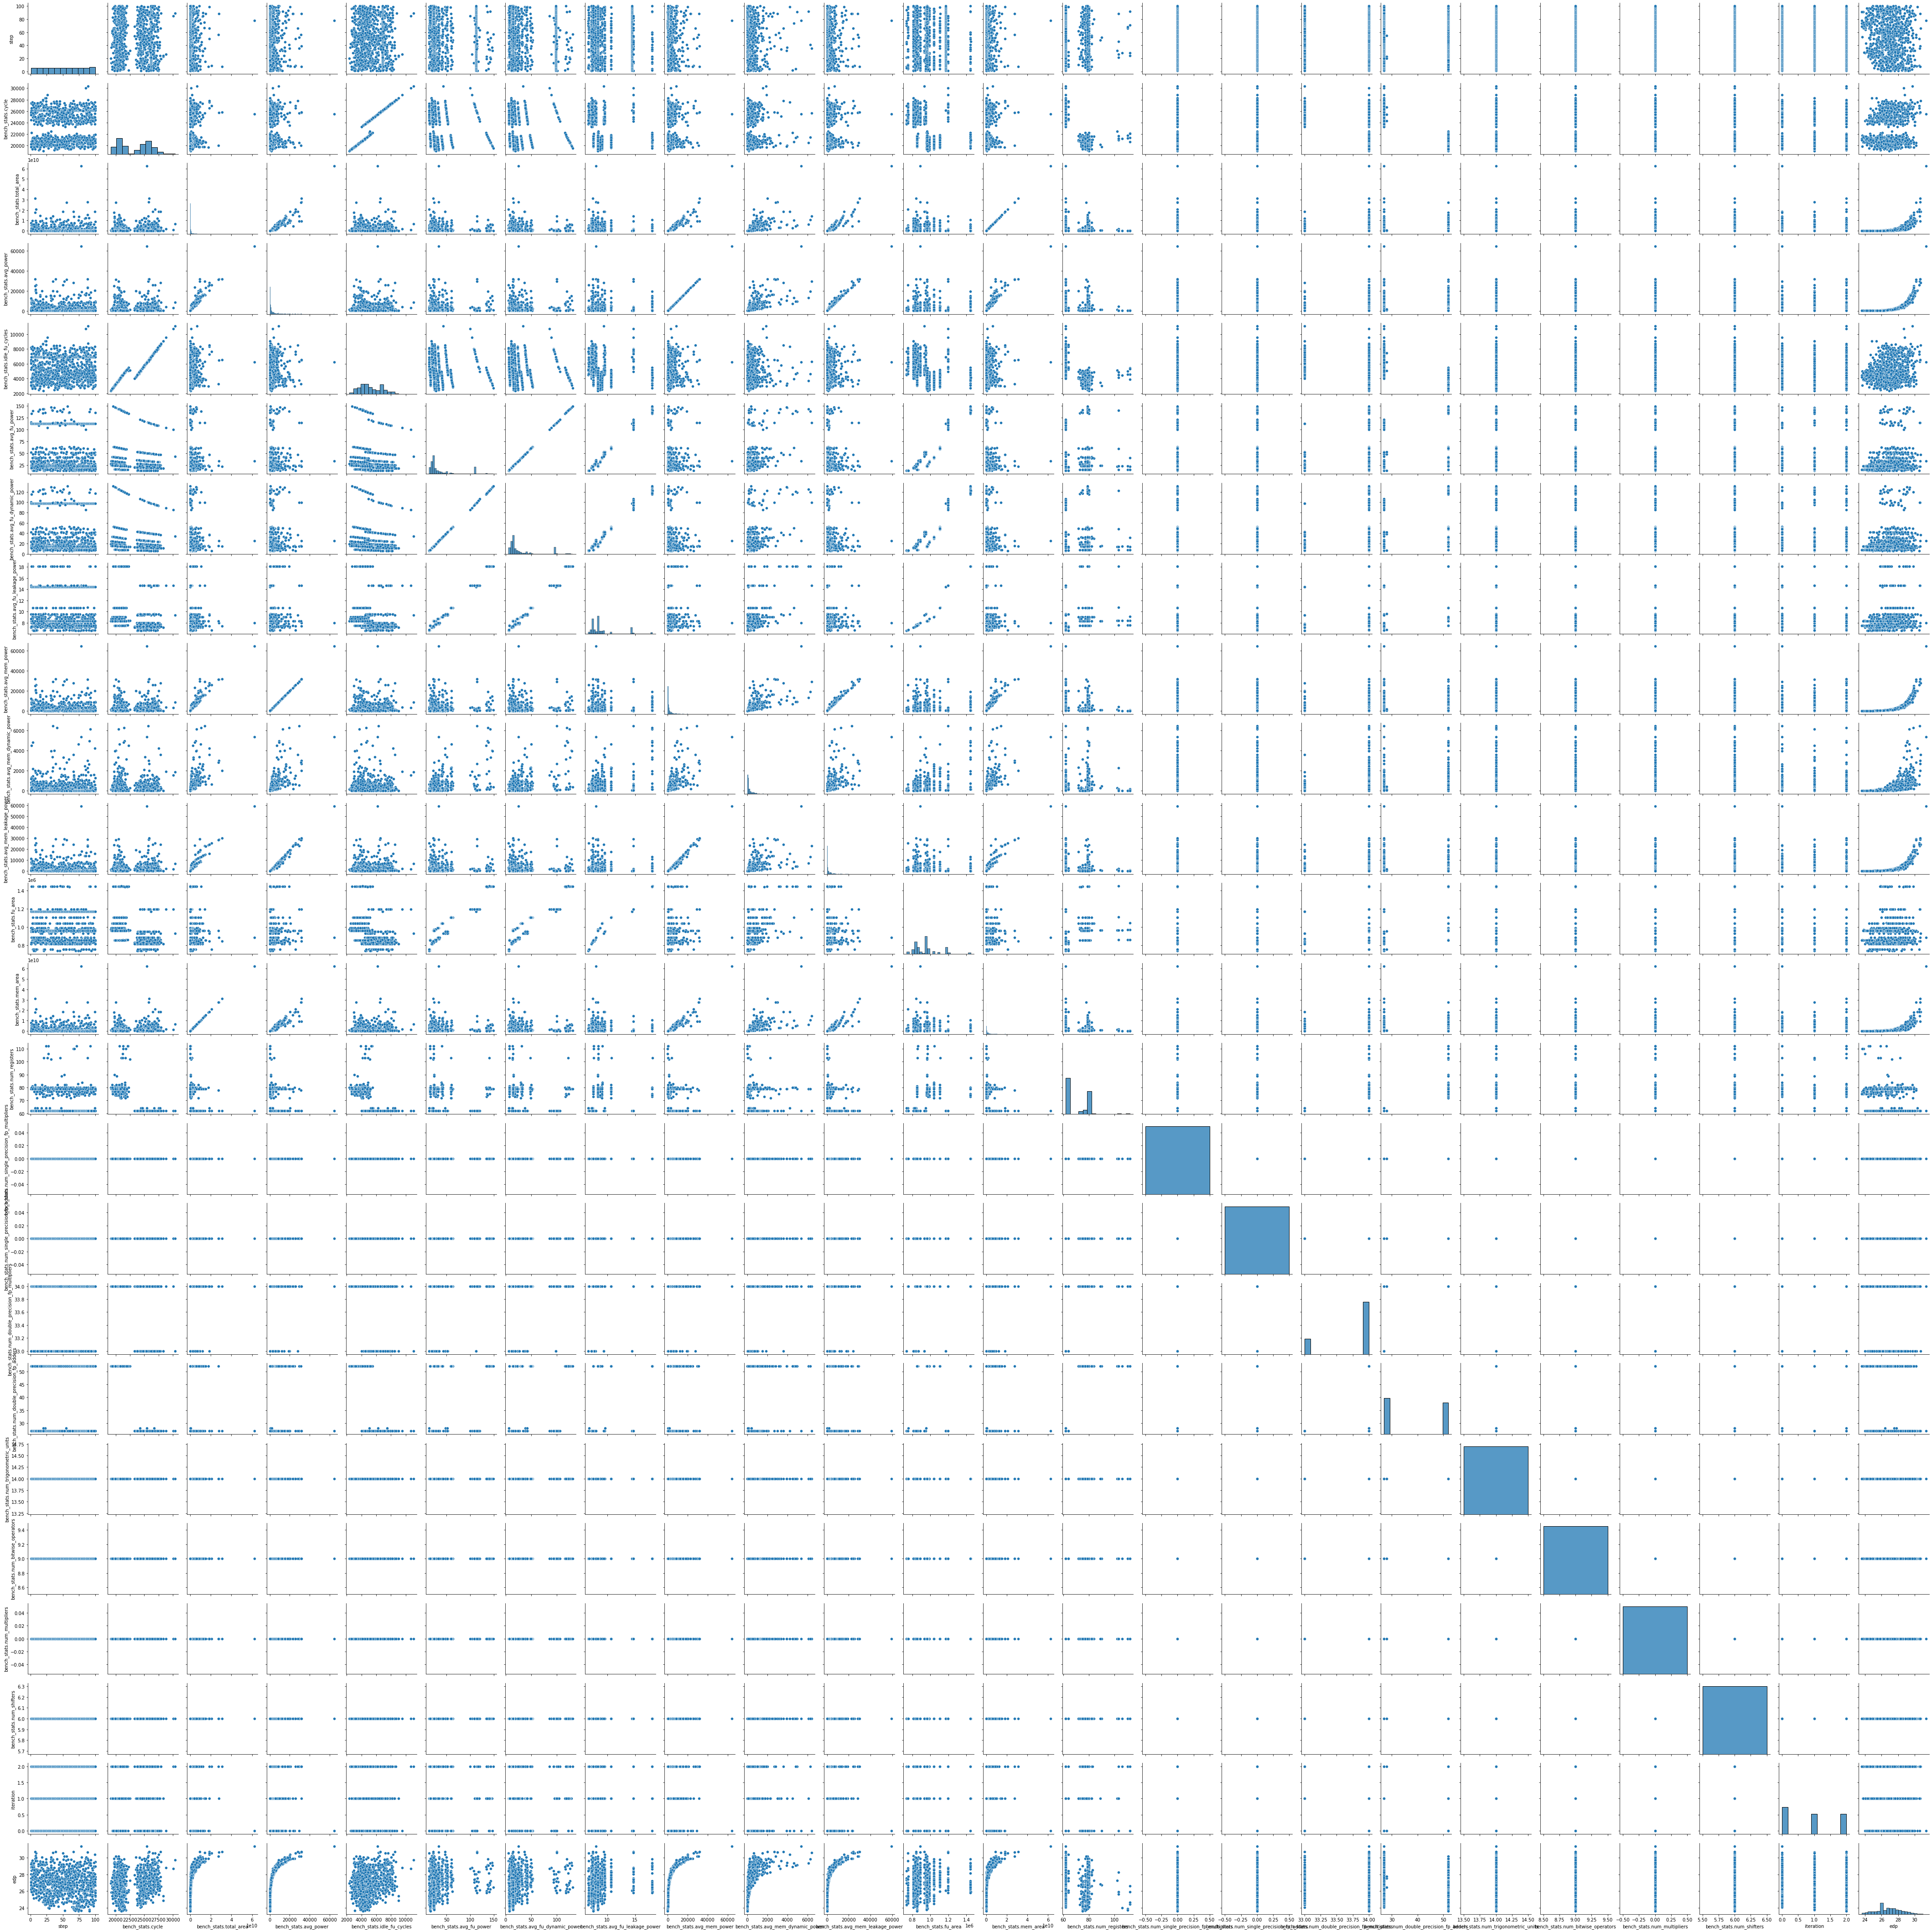

In [20]:
import seaborn as sns

sns.pairplot(system_pref)

In [25]:
# join against other performance metrics
main_target_df = model_comparison_data.system_performance[["edp", "model", "step", "iteration"]]

In [32]:
combined_perf = df.system.merge(main_target_df, on=["model", "step", "iteration"])

In [33]:
# Check correlations between different summary objectives
# target_var = "mixgraph_iops"
target_var = "edp"
### Correlation between target features
feature_corr = combined_perf.corr()
# sns.heatmap(feature_corr, annot=True, cmap = plt.cm.Reds)
# target is mixgraph_iops
cor_target = abs(feature_corr[target_var])  # Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
len(relevant_features)
for feature in relevant_features.keys():
    print(feature)

host_mem_usage
edp


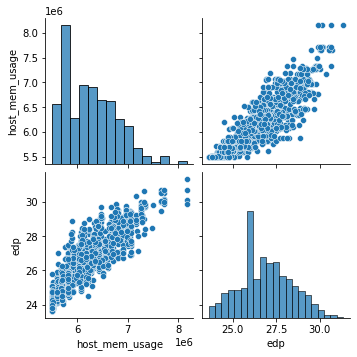

In [34]:
sns.pairplot(combined_perf[["host_mem_usage", "edp"]])

# Comparison between parameters and system metrics

In [37]:
param_targets = model_comparison_data.parameters.merge(df.system, on=["model", "step", "iteration"])

In [38]:
from notebooks.gem5.utils import highest_correlation

highest_correlation(param_targets, "host_mem_usage")

cache_size        0.743800
cache_line_sz     0.670804
host_mem_usage    1.000000
Name: host_mem_usage, dtype: float64

In [41]:
# All params and targets
param_statistics = model_comparison_data.parameters.merge(df.performance, on=["model", "step", "iteration"])

In [48]:
corr_filter = abs(param_statistics.corr()) > 0.5

In [67]:
parameters = model_comparison_data.parameters.columns.to_list()[:-3]

In [82]:
param_to_stat = {}
for param in parameters:
    param_to_stat[param] = corr_filter[param].loc[corr_filter[param]].index.to_list()

In [83]:
param_to_stat

{'cycle_time': ['cycle_time',
  'system.cpu.branchPred.RASInCorrect',
  'system.cpu.cc_regfile_reads',
  'system.cpu.commit.branches',
  'system.cpu.commit.commitNonSpecStalls',
  'system.cpu.commit.committedInsts',
  'system.cpu.commit.committedOps',
  'system.cpu.commit.fp_insts',
  'system.cpu.commit.function_calls',
  'system.cpu.commit.int_insts',
  'system.cpu.commit.loads',
  'system.cpu.commit.refs',
  'system.cpu.committedInsts',
  'system.cpu.committedOps',
  'system.cpu.fetch.MiscStallCycles',
  'system.cpu.fetch.PendingTrapStallCycles',
  'system.cpu.icache.prefetcher.pfBufferHit',
  'system.cpu.icache.prefetcher.pfRemovedFull',
  'system.cpu.iew.exec_branches',
  'system.cpu.itb.wrMisses',
  'system.cpu.rename.CommittedMaps',
  'system.cpu.workload.numSyscalls',
  'system.membus.snoops',
  'system.membus.snoopTraffic',
  'system.membus.respLayer3.occupancy',
  'system.tol2bus.reqLayer0.occupancy',
  'system.tol2bus.snoopLayer0.occupancy',
  'system.tol2bus.respLayer1.occup